In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import metrics
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

Read our dataset:

In [2]:
nucl_data = pd.read_csv('nucldata_cleaned_full.csv', 
                        sep = ',')
nucl_data = nucl_data.drop(['X','preparation', 'prot_name'],axis=1)
nucl_data

,species_name,Helix,Beta.bridge,Strand,Helix.3,Helix.5,Turn,Bend,Other,dist_clamp_1,...,Angle_between_COM_and_Calpha_of_hel_4,Angle_between_COM_and_Calpha_of_hel_5,Angle_between_COM_and_Calpha_of_hel_6,Angle_between_COM_and_Calpha_of_hel_7,Angle_between_COM_and_Calpha_of_hel_8,Angle_between_COM_and_Calpha_of_hel_9,Angle_between_COM_and_Calpha_of_hel_10,COM_x,COM_y,COM_z
0,rat,60.317460,0.0,2.777778,5.555556,0.0,11.904762,5.952381,13.492063,18.772254,...,-28.134270,53.883654,14.030842,2.623092,7.676063,-43.763860,48.972919,13.349842,20.147798,41.787953
1,human,59.842520,0.0,2.755906,4.724409,0.0,10.629921,5.511811,16.535433,18.996535,...,55.215760,17.468010,1.226074,6.150571,-42.244937,57.144269,48.842916,18.290441,-6.193724,18.697197
2,zebrafish,62.650602,0.0,2.811245,2.008032,0.0,12.851406,5.622490,14.056225,18.261147,...,54.062219,33.093973,1.044740,15.244886,-42.725393,57.210145,52.251289,8.653866,37.391085,42.200621
3,human,57.421875,0.0,2.734375,5.859375,0.0,10.546875,7.031250,16.406250,19.096903,...,45.047160,-45.806284,53.323231,13.209491,4.239240,7.651877,-39.745646,13.233800,20.638833,41.367259
4,rat,58.555133,0.0,2.661597,2.281369,0.0,13.688213,6.844106,15.969582,18.227234,...,14.405237,4.956299,8.330556,-44.147992,57.133413,51.881098,NaN,18.216867,0.543652,19.482196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,rat,56.321839,0.0,2.681992,3.831418,0.0,15.708812,8.045977,13.409962,18.842615,...,53.766404,17.366851,2.768396,7.741541,-42.867106,57.124091,48.943928,14.426456,-4.968180,61.244284
298,rat,62.948207,0.0,2.788845,3.187251,0.0,12.749004,4.780876,13.545817,18.495273,...,54.094324,19.424467,-1.201638,5.404590,-40.834158,57.100592,49.096946,56.289998,-0.701228,1.823249
299,rat,57.414449,0.0,2.661597,4.942966,0.0,14.828897,7.604563,12.547529,18.593481,...,53.953962,16.732478,7.391420,16.025997,-43.689580,57.140055,51.551273,17.628527,4.691382,19.826932
300,rat,62.400000,0.0,2.800000,3.200000,0.0,14.400000,4.400000,12.800000,18.306047,...,54.267716,19.202382,0.829831,6.417445,-40.145995,57.150244,49.388597,18.395058,4.049283,19.032577


And look on descriptive statistics:

In [3]:
nucl_data.describe()

,Helix,Beta.bridge,Strand,Helix.3,Helix.5,Turn,Bend,Other,dist_clamp_1,dist_clamp_2,...,Angle_between_COM_and_Calpha_of_hel_4,Angle_between_COM_and_Calpha_of_hel_5,Angle_between_COM_and_Calpha_of_hel_6,Angle_between_COM_and_Calpha_of_hel_7,Angle_between_COM_and_Calpha_of_hel_8,Angle_between_COM_and_Calpha_of_hel_9,Angle_between_COM_and_Calpha_of_hel_10,COM_x,COM_y,COM_z
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,286.000000,286.000000,...,292.000000,292.000000,292.000000,292.000000,292.000000,291.000000,273.000000,302.000000,302.000000,302.000000
mean,59.811013,0.030393,2.675640,4.312998,0.039213,12.779222,6.128308,14.223212,18.635221,13.737489,...,32.202573,22.208260,9.836906,6.202876,-21.637252,29.462813,44.473844,13.760621,12.414138,22.830585
std,2.110444,0.137374,0.446195,1.182373,0.275973,1.560182,1.513382,1.013347,0.318261,0.234781,...,35.094917,24.586938,14.069514,11.558911,27.359109,42.403499,23.939351,21.062161,15.636453,21.077582
min,53.543307,0.000000,0.000000,1.181102,0.000000,8.747515,2.816901,11.494253,17.996449,13.120515,...,-48.490230,-47.013592,-6.421688,-47.735795,-44.732368,-48.532281,-45.097471,-30.443267,-21.930911,-24.451273
25%,57.859309,0.000000,2.694906,3.515625,0.000000,11.565339,4.819277,13.600000,18.392215,13.583135,...,15.494093,16.381370,1.497262,4.057846,-42.515333,7.631013,48.903355,8.845826,-0.206680,13.957350
50%,60.156250,0.000000,2.755906,4.373775,0.000000,12.851406,5.976096,14.117647,18.584705,13.697799,...,53.841912,19.349503,6.490166,5.918674,-39.127628,57.105418,49.601550,13.359436,4.618507,19.793366
75%,61.381116,0.000000,2.800000,5.118110,0.000000,13.944223,7.169811,14.878982,18.935437,13.839376,...,54.133872,43.387521,12.965548,10.120024,6.601475,57.152317,52.129301,18.000074,21.010009,41.842361
max,65.461847,0.950570,3.830645,8.267717,2.024291,17.578125,10.344828,19.391635,19.421736,14.380385,...,57.078191,56.715556,53.951038,55.300101,57.196625,57.220922,57.268933,172.456557,39.236476,61.244284


While we try to cluster our data in last time we found that data have some outliers. So we'll remove it.

In [4]:
largest = nucl_data['Prot_Helix_1_distance'].nlargest(5)
nucl_data_without_max = nucl_data[~nucl_data.Prot_Helix_1_distance.isin(largest)]

Next let clean our data from totally empty (or mainly empty) columns. And drop observations with NaN.

In [5]:
nucl_data_without_nan = nucl_data_without_max.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
nucl_data_without_nan

,species_name,Helix,Beta.bridge,Strand,Helix.3,Helix.5,Turn,Bend,Other,dist_clamp_1,...,Angle_between_COM_and_Calpha_of_hel_4,Angle_between_COM_and_Calpha_of_hel_5,Angle_between_COM_and_Calpha_of_hel_6,Angle_between_COM_and_Calpha_of_hel_7,Angle_between_COM_and_Calpha_of_hel_8,Angle_between_COM_and_Calpha_of_hel_9,Angle_between_COM_and_Calpha_of_hel_10,COM_x,COM_y,COM_z
0,rat,60.317460,0.0,2.777778,5.555556,0.0,11.904762,5.952381,13.492063,18.772254,...,-28.134270,53.883654,14.030842,2.623092,7.676063,-43.763860,48.972919,13.349842,20.147798,41.787953
1,human,59.842520,0.0,2.755906,4.724409,0.0,10.629921,5.511811,16.535433,18.996535,...,55.215760,17.468010,1.226074,6.150571,-42.244937,57.144269,48.842916,18.290441,-6.193724,18.697197
2,zebrafish,62.650602,0.0,2.811245,2.008032,0.0,12.851406,5.622490,14.056225,18.261147,...,54.062219,33.093973,1.044740,15.244886,-42.725393,57.210145,52.251289,8.653866,37.391085,42.200621
3,human,57.421875,0.0,2.734375,5.859375,0.0,10.546875,7.031250,16.406250,19.096903,...,45.047160,-45.806284,53.323231,13.209491,4.239240,7.651877,-39.745646,13.233800,20.638833,41.367259
5,zebrafish,59.920635,0.0,2.777778,1.984127,0.0,12.301587,7.936508,15.079365,18.386542,...,54.213521,20.193228,1.312308,4.462589,-41.344808,57.169116,52.140192,8.921625,36.463007,42.442288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,rat,56.321839,0.0,2.681992,3.831418,0.0,15.708812,8.045977,13.409962,18.842615,...,53.766404,17.366851,2.768396,7.741541,-42.867106,57.124091,48.943928,14.426456,-4.968180,61.244284
298,rat,62.948207,0.0,2.788845,3.187251,0.0,12.749004,4.780876,13.545817,18.495273,...,54.094324,19.424467,-1.201638,5.404590,-40.834158,57.100592,49.096946,56.289998,-0.701228,1.823249
299,rat,57.414449,0.0,2.661597,4.942966,0.0,14.828897,7.604563,12.547529,18.593481,...,53.953962,16.732478,7.391420,16.025997,-43.689580,57.140055,51.551273,17.628527,4.691382,19.826932
300,rat,62.400000,0.0,2.800000,3.200000,0.0,14.400000,4.400000,12.800000,18.306047,...,54.267716,19.202382,0.829831,6.417445,-40.145995,57.150244,49.388597,18.395058,4.049283,19.032577


Great. We have some prepared data to analysis. First let look on scatter plot with species.

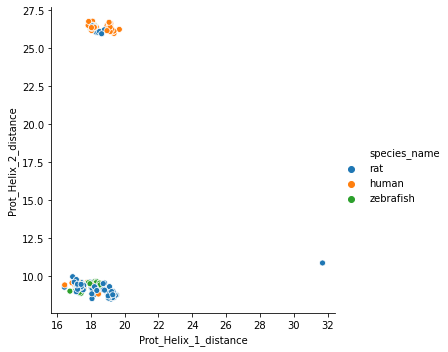

In [6]:
sns.relplot(x = 'Prot_Helix_1_distance', 
            y = 'Prot_Helix_2_distance', 
            hue='species_name', data = nucl_data_without_nan)

Next we gonna drop species_name. Because we don't need categorical variables in our analysis.

In [7]:
nucl_data_without_class = nucl_data_without_nan.drop(['species_name'], axis=1)

Ok. Let calculate optimal number of clusters.

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nucl_data_without_class)
    Sum_of_squared_distances.append(km.inertia_)

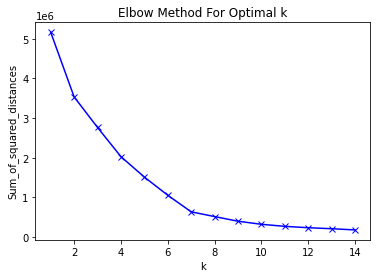

In [9]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Great. Optimal number of clusters equals 7. Let build our k-means model with k-means++ for better calculating of centroids.

In [10]:
k_means_nucl = KMeans(n_clusters=7,  n_init=100, init='k-means++', max_iter=10000000)
y_kmeans = k_means_nucl.fit_predict(nucl_data_without_class)
nucl_data_without_class['y_kmeans'] = y_kmeans

We will use TSNE algorythm for proper data visualisation.

In [11]:
nucl_data_embeded = TSNE(n_components=2).fit_transform(nucl_data_without_class)
nucl_data_embeded_dataframed = pd.DataFrame(nucl_data_embeded, columns=['Feature 0', 'Feature 1'])
nucl_data_embeded_dataframed = pd.concat([nucl_data_embeded_dataframed, pd.Series(y_kmeans, name='clusters').astype('category')], axis=1, sort=False)
nucl_data_embeded_dataframed

,Feature 0,Feature 1,clusters
0,11.488539,-16.837465,1
1,-10.321946,-0.451993,2
2,16.016977,8.724262,0
3,13.492563,-7.860657,4
4,17.778236,8.141074,0
...,...,...,...
239,-13.895518,8.132271,2
240,-15.990181,-3.544679,6
241,-8.538796,6.342599,2
242,-6.972280,1.174292,2


And finally visualise it.

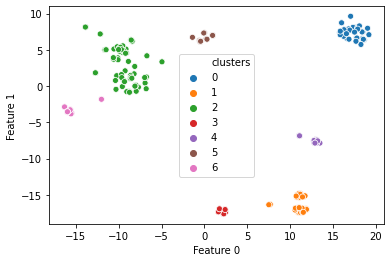

In [12]:
sns.scatterplot(x="Feature 0", y='Feature 1', 
                hue='clusters',
                     data=nucl_data_embeded_dataframed)

In [13]:
nucl_data_embeded = PCA(n_components=2).fit_transform(nucl_data_without_class)
nucl_data_embeded_dataframed = pd.DataFrame(nucl_data_embeded, columns=['Feature 0', 'Feature 1'])
nucl_data_embeded_dataframed = pd.concat([nucl_data_embeded_dataframed, pd.Series(y_kmeans, name='clusters').astype('category')], axis=1, sort=False)
nucl_data_embeded_dataframed

,Feature 0,Feature 1,clusters
0,132.821785,-65.382472,1
1,-61.297996,40.204409,2
2,-52.743559,-98.116871,0
3,62.717127,-89.256772,4
4,-55.473943,-95.967518,0
...,...,...,...
239,-63.625550,-80.024915,2
240,-73.129994,105.959704,6
241,-59.032877,22.329939,2
242,-60.095395,22.812989,2


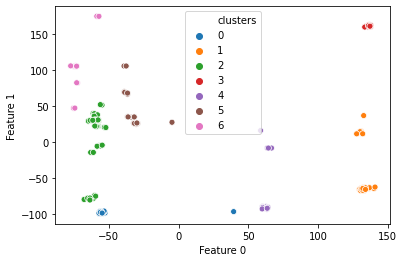

In [14]:
sns.scatterplot(x="Feature 0", y='Feature 1', 
                hue='clusters',
                     data=nucl_data_embeded_dataframed)